# PyKis v2

### 시크릿 키 관리 방법

시크릿 키를 관리하는 방법은 크게 2가지가 있습니다.

1. 직접 시크릿 키를 입력하는 방법

In [ ]:
from pykis.kis import PyKis

kis = PyKis(
    appkey="YOUR_APP_KEY",
    appsecret="YOUR_APP_SECRET",
)

2. 시크릿 키를 파일로 관리하는 방법

In [ ]:
# 먼저 시크릿 키를 파일로 저장합니다.
from pykis.client.auth import KisAuth

auth = KisAuth(
    # 앱 키  예) Pa0knAM6JLAjIa93Miajz7ykJIXXXXXXXXXX
    appkey="YOUR_APP_KEY",
    # 앱 시크릿  예) V9J3YGPE5q2ZRG5EgqnLHn7XqbJjzwXcNpvY . . .
    appsecret="YOUR_APP_SECRET",
    # 앱 키와 연결된 계좌번호  예) 00000000-01
    account="00000000-01",
    # 가상계좌 여부
    virtual=False,
)

# 안전한 경로에 시크릿 키를 파일로 저장합니다.
auth.save("secret.json")

In [ ]:
# 저장된 시크릿 키를 사용하여 PyKis 객체를 생성합니다.
from pykis.kis import PyKis
from pykis.client.auth import KisAuth

kis = PyKis("secret.json")
# 또는
kis = PyKis(KisAuth.load("secret.json"))

### 종목 시세 및 차트 조회 방법

기본적으로 어떠한 종목이든 시세를 조회하려면 `kis.stock('AAPL')` 처럼 종목의 스코프를 받아와야 합니다.

국내주식, 해외주식에 상관 없이 모두 동일한 방법으로 조회할 수 있습니다.

In [ ]:
# 국내 주식
hynix = kis.stock('000660') # SK하이닉스 (코스피)
ecopro = kis.stock('247540') # 에코프로비엠 (코스닥)

# 해외 주식 (미국)
apple = kis.stock('AAPL') # 애플 (나스닥)
coupang = kis.stock('CPNG') # 쿠팡 (뉴욕)

하지만 종목이 발견될 때 까지 모든 시장을 순회하며 조회하므로 시장 정보를 함께 입력하면 더 빠르게 조회할 수 있습니다.

기본값은 한국 -> 미국 -> 일본 -> 홍콩 -> 베트남 -> 중국 순으로 조회합니다.

In [ ]:
tokyo_electric = kis.stock('9501', market='TKSE') # 도쿄 전력 (도쿄)
# 또는 국가코드를 사용할 수 있습니다.
tokyo_electric = kis.stock('9501', market='JP') # 도쿄 전력 (도쿄)

PyKis의 stock함수로 얻은 종목 스코프(`KisInfoStock`)는 기본적인 종목 정보를 담고 있습니다.

In [ ]:
print(f"""
종목코드: {hynix.code}
종목명: {hynix.name}
종목시장: {hynix.market}
""")

# 또한 info 프로퍼티를 통해 상세 정보를 얻을 수 있습니다.
print(f"""
종목코드: {hynix.info.code}
종목표준코드: {hynix.info.std_code}
종목명: {hynix.info.name}
종목영문명: {hynix.info.name_eng}
종목시장: {hynix.info.market}
종목시장한글명: {hynix.info.market_name}
""")

이렇게 얻은 종목 스코프를 이용해 시세를 조회할 수 있습니다.

#### 주식 시세 조회

해당 함수는 국내주식 및 해외주식의 시세를 조회합니다.

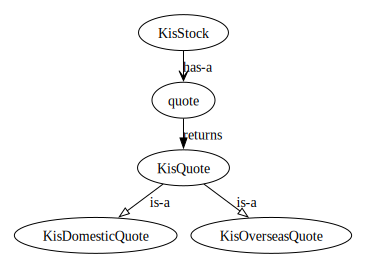

In [29]:
from pykis.api.stock.quote import KisQuote

quote: KisQuote = coupang.quote()

In [ ]:
quote = coupang.quote() # 해당 종목의 시세를 조회합니다.

print(f"""
종목코드: {quote.code}
종목명: {quote.name}
종목시장: {quote.market}

업종명: {quote.sector_name}

현재가: {quote.price}
거래량: {quote.volume}
거래대금: {quote.amount}
시가총액: {quote.market_cap}
대비부호: {quote.sign}
위험도: {quote.risk}
거래정지: {quote.halt}
단기과열구분: {quote.overbought}

전일종가: {quote.prev_price}
전일거래량: {quote.prev_volume}
전일대비: {quote.change}

상한가: {quote.high_limit}
하한가: {quote.low_limit}
거래단위: {quote.unit}
호가단위: {quote.tick}
소수점 자리수: {quote.decimal_places}

통화코드: {quote.currency}
당일환율: {quote.exchange_rate}

당일시가: {quote.open}
당일고가: {quote.high}
당일저가: {quote.low}

등락율: {quote.rate}
대비부호명: {quote.sign_name}

==== 종목 지표 ====

EPS (주당순이익): {quote.indicator.eps}
BPS (주당순자산): {quote.indicator.bps}
PER (주가수익비율): {quote.indicator.per}
PBR (주가순자산비율): {quote.indicator.pbr}

52주 최고가: {quote.indicator.week52_high}
52주 최저가: {quote.indicator.week52_low}
52주 최고가 날짜: {quote.indicator.week52_high_date.strftime("%Y-%m-%d")}
52주 최저가 날짜: {quote.indicator.week52_low_date.strftime("%Y-%m-%d")}
""")

#### 차트 조회

해당 함수는 국내주식 및 해외주식의 당일 분봉과 기간 봉 차트를 조회합니다.

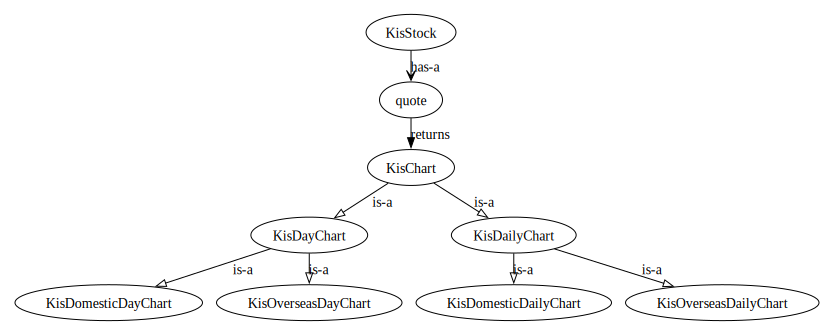

In [30]:
from pykis.api.stock.chart import KisChart
from pykis.api.stock.daily_chart import KisDailyChart
from pykis.api.stock.day_chart import KisDayChart

chart: KisChart = coupang.chart() # 통합 차트 조회
daily_chart: KisDailyChart = coupang.daily_chart() # 일,주,월,년 차트 조회
day_chart: KisDayChart = coupang.day_chart() # 당일 분봉 차트 조회

In [ ]:
from datetime import date, time

chart = coupang.chart() # 기본값은 최근 7일 일봉입니다.
# 최근 기간 조회는 아래와 같이 시간 표현식을 사용할 수 있습니다.
# 1m: 1분
# 1h: 1시간
# 1d: 1일
# 1w: 1주
# 1M: 1개월 (개월 단위는 대문자 M)
# 1y: 1년
# 1y6M: 1년 6개월
chart = coupang.chart("3d") # 최근 3일 일봉입니다.
chart = coupang.chart("1y", period='month') # 최근 1년간의 월봉입니다.
chart = coupang.chart(period='year') # 상장 이래의 연간 일봉입니다.
chart = coupang.chart(start=date(2023, 1, 1)) # 2023년 1월 1일부터 현재까지의 일봉입니다.
chart = coupang.chart(start=date(2023, 1, 1), end=date(2024, 1, 1)) # 2023년 1월 1일부터 2023년 12월 31일까지의 일봉입니다.

chart = coupang.chart('1h', period=1) # 최근 1시간의 1분봉입니다.
chart = coupang.chart(period=5) # 당일 5분봉입니다.
chart = coupang.chart(period=1, end=time(12, 30)) # 당일 12시 30분까지의 1분봉입니다.

시각화 예제입니다.

먼저 필요한 라이브러리를 설치합니다.

In [ ]:
!pip install pandas lightweight-charts

In [17]:
from datetime import datetime, timedelta
from pandas import DataFrame
from lightweight_charts import JupyterChart

chart_view = JupyterChart(width=1280, height=720)
chart = apple.chart('1y')

chart_view.set(DataFrame({
    'time': [bar.time.strftime("%Y-%m-%d %H:%M:%S") for bar in chart],
    'open': [float(bar.open) for bar in chart],
    'high': [float(bar.high) for bar in chart],
    'low': [float(bar.low) for bar in chart],
    'close': [float(bar.close) for bar in chart],
    'volume': [bar.volume for bar in chart],
}))

chart_view.set_visible_range(datetime.now() - timedelta(days=365), datetime.now())

chart_view.load()

[10/14 01:35:55] DEBG API [HHDFS76240000]: {'AUTH': '', 'EXCD': 'NAS', 'SYMB': 'AAPL', 'GUBN': '0', 'BYMD': '', 'MODP': '0'}, . -> 0:MCA00000 (정상처리 되었습니다.)
[10/14 01:35:55] DEBG API [HHDFS76240000]: {'AUTH': '', 'EXCD': 'NAS', 'SYMB': 'AAPL', 'GUBN': '0', 'BYMD': '20230522', 'MODP': '0'}, . -> 0:MCA00000 (정상처리 되었습니다.)
[10/14 01:35:55] DEBG API [HHDFS76240000]: {'AUTH': '', 'EXCD': 'NAS', 'SYMB': 'AAPL', 'GUBN': '0', 'BYMD': '20221227', 'MODP': '0'}, . -> 0:MCA00000 (정상처리 되었습니다.)


#### ~~예제 작성용 코드~~
해당 예제 파일을 작성할 때 사용한 코드입니다. 무시해도 됩니다.

In [1]:
# kis 로드
from logging import DEBUG
from pykis.kis import PyKis
from pykis import logging

logging.logger.setLevel(DEBUG)

kis = PyKis("B:\\ack.json")

In [28]:
# UML 시각화
from typing import Callable
from graphviz import Digraph
def class_tree(*classes: type):
    class_dict = {cls: [] for cls in classes}

    for cls in classes:
        parent_classes = [base for base in cls.__bases__ if base != object and base in class_dict]

        for parent in parent_classes:
            class_dict[parent].append(cls)

    def build_tree(cls):
        return (cls, [build_tree(child) for child in class_dict[cls]])

    return [
        build_tree(root)
        for root in (set(classes) - set(child for parent in classes for child in class_dict[parent]))
    ]


def digraph_class_tree(*classes: type):
    dot = Digraph()
    dot.attr('graph', pad='0.3')

    def add_nodes_edges(tree):
        cls, children = tree
        dot.node(str(id(cls)), label=cls.__name__)

        for child in children:
            child_cls, _ = child
            dot.edge(str(id(cls)), str(id(child_cls)), label='is-a', arrowhead='empty')
            add_nodes_edges(child)
    
    for tree in class_tree(*classes):
        add_nodes_edges(tree)

    return dot

def cfrt(cls: type, func: Callable, return_types: list[type]):
    dot = digraph_class_tree(*return_types)
    dot.attr(pad='0.2', ranksep='0.2', nodesep='0.2')


    dot.node(str(id(cls)), label=cls.__name__)
    dot.node(str(id(func)), label=func.__name__)
    
    dot.edge(str(id(cls)), str(id(func)), label='has-a', arrowhead='vee')
    dot.edge(str(id(func)), str(id(return_types[0])), label='returns')

    return dot
